In [2]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from pycocotools.coco import COCO
import os, math, cv2

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


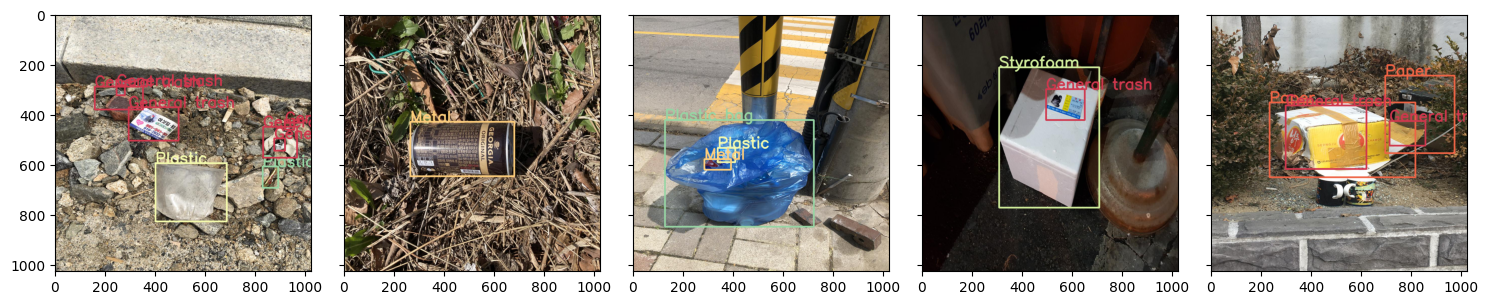

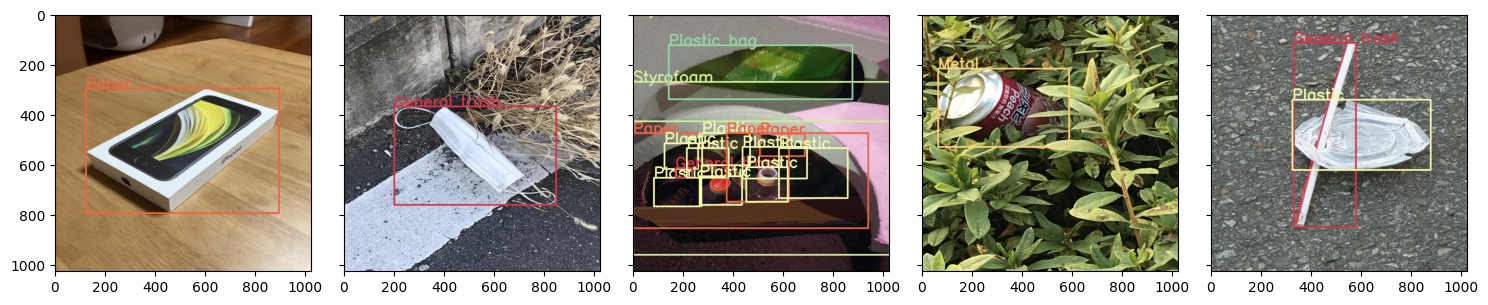

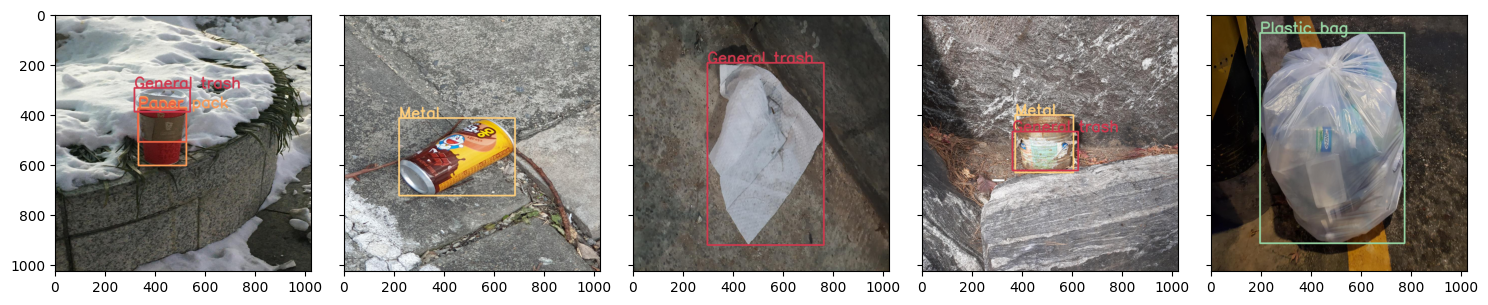

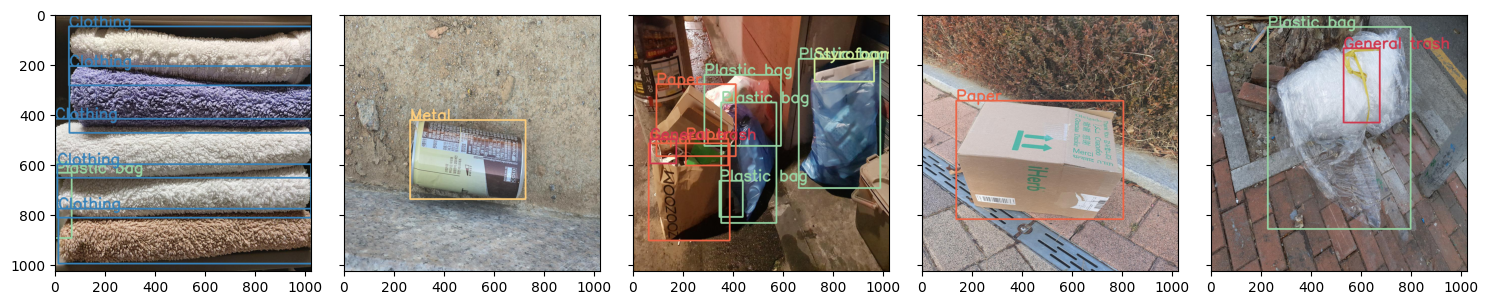

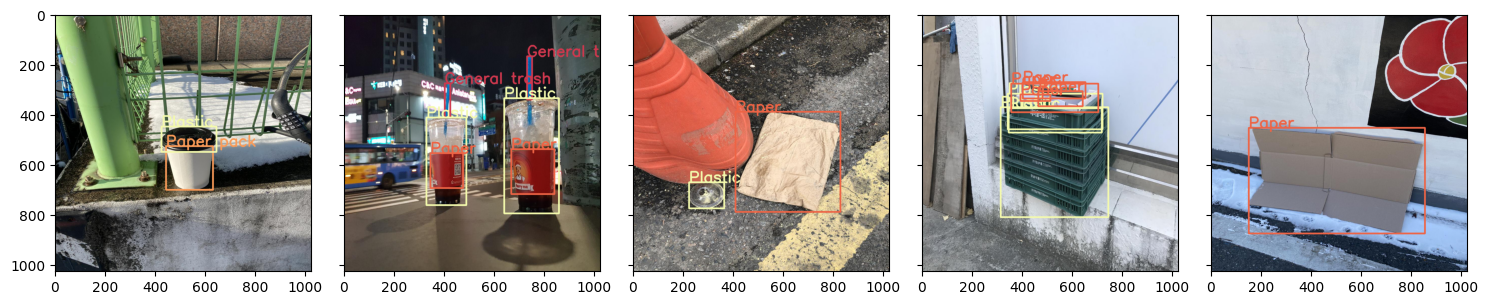

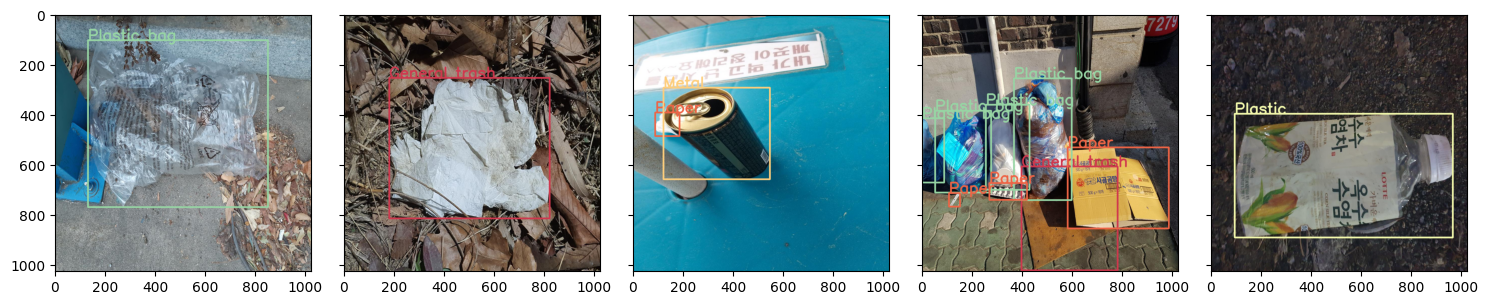

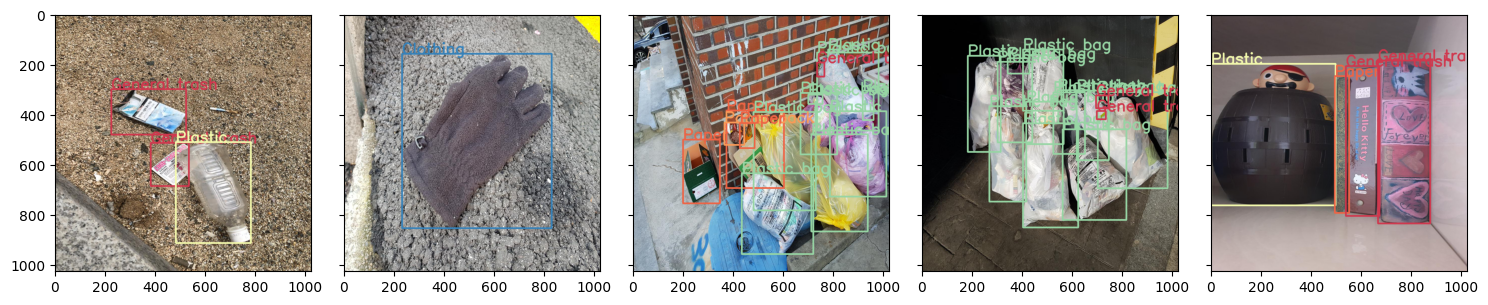

In [3]:
LABEL_COLORS = [px.colors.convert_to_RGB_255(x) for x in sns.color_palette("Spectral", 10)]

img_cnt = 5 # 한줄에 보고싶은 이미지 갯수 설정
train_path = '/data/ephemeral/home/dataset/' # train 폴더가 있는 경로 입력

coco = COCO('/data/ephemeral/home/dataset/train.json')

classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]
img_ids = coco.getImgIds()
cnt = math.ceil(len(img_ids)/img_cnt)
for i in range(cnt):
    if i < 100 : 
        continue
    fig, axes = plt.subplots(1, img_cnt, sharex=True, sharey=True, figsize=(15, 15))
    for j in range(img_cnt):
        image_info = coco.loadImgs(img_ids[img_cnt*i+j])[0]
        ann_ids = coco.getAnnIds(imgIds=image_info['id'])
        anns = coco.loadAnns(ann_ids)
        img = np.array(Image.open(os.path.join(train_path, image_info['file_name'])))
        for ann in anns:
            cate_id = ann['category_id']
            xmin, ymin, ww, hh = map(int, ann['bbox'])
            cv2.rectangle(img, (xmin,ymin), (xmin+ww,ymin+hh), LABEL_COLORS[cate_id], 5)
            cv2.putText(img, classes[ann['category_id']], (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, 2, LABEL_COLORS[cate_id], 5)
        axes[j].imshow(img)
    plt.tight_layout()
    plt.show()
    
    if i > 105 :
        break